# Multiple Regression

Shows how to calculate just the best fit, or - using "statsmodels" - all the
corresponding statistical parameters.

Also shows how to make 3d plots.

Author: Thomas Haslwanter, Date:   April-2020

In [ ]:
# The standard imports
%pylab inline
import pandas as pd
# For the 3d plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# For the statistic
from statsmodels.formula.api import ols

Populating the interactive namespace from numpy and matplotlib


C:\Programs\WPy64-39100\python-3.9.10.amd64\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


## Generate and show the data

C:\Users\thomas\AppData\Local\Temp\ipykernel_17960\4182290083.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


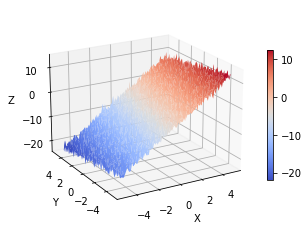

In [6]:
x = np.linspace(-5,5,101)
(X,Y) = np.meshgrid(x,x)
Z = -5 + 3*X-0.5*Y+np.random.randn(np.shape(X)[0], np.shape(X)[1])

# Plot the figure
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X,Y,Z, cmap=cm.coolwarm)
ax.view_init(20,-120)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.colorbar(surf, shrink=0.6)

## Simple plane fit

In [ ]:
M = np.vstack((np.ones(len(X)), X, Y)).T
bestfit = np.linalg.lstsq(M,Z, rcond=None)[0]
print('Best fit plane:', bestfit)

Best fit plane: [[-0.02328664 -0.02299515 -0.02270018 ...  0.01102281  0.01137216
   0.01162724]
 [-0.00472996 -0.00569356 -0.00487885 ... -0.00450615 -0.00466169
  -0.00543047]
 [-0.00472996 -0.00569356 -0.00487885 ... -0.00450615 -0.00466169
  -0.00543047]
 ...
 [-0.11177589 -0.11037671 -0.10896087 ...  0.05290947  0.05458637
   0.05581077]
 [-0.11410456 -0.11267622 -0.11123089 ...  0.05401175  0.05572359
   0.0569735 ]
 [-0.11643322 -0.11497574 -0.1135009  ...  0.05511403  0.0568608
   0.05813622]]


## Multilinear regression model

In [ ]:
# calculate fit, P-values, confidence intervals etc.
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()
# Convert the data into a Pandas DataFrame
df = pd.DataFrame({'x':X, 'y':Y, 'z':Z})

# Fit the model
model = ols("z ~ x + y", df).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 4.060e+05
Date:                Wed, 23 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:34:51   Log-Likelihood:                -14438.
No. Observations:               10201   AIC:                         2.888e+04
Df Residuals:                   10198   BIC:                         2.890e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.0076      0.010   -507.516      0.0